In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vlsruthi","key":"17465e1a4d6e307ad4367f481c139a4d"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d harsh0251/autism-dataset

Dataset URL: https://www.kaggle.com/datasets/harsh0251/autism-dataset
License(s): unknown
 94% 216M/229M [00:00<00:00, 595MB/s] 
100% 229M/229M [00:00<00:00, 604MB/s]


In [4]:
!unzip autism-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/consolidated/Autistic/0881.jpg  
  inflating: dataset/consolidated/Autistic/0882.jpg  
  inflating: dataset/consolidated/Autistic/0883.jpg  
  inflating: dataset/consolidated/Autistic/0884.jpg  
  inflating: dataset/consolidated/Autistic/0885.jpg  
  inflating: dataset/consolidated/Autistic/0886.jpg  
  inflating: dataset/consolidated/Autistic/0887.jpg  
  inflating: dataset/consolidated/Autistic/0888.jpg  
  inflating: dataset/consolidated/Autistic/0889.jpg  
  inflating: dataset/consolidated/Autistic/0890.jpg  
  inflating: dataset/consolidated/Autistic/0891.jpg  
  inflating: dataset/consolidated/Autistic/0892.jpg  
  inflating: dataset/consolidated/Autistic/0893.jpg  
  inflating: dataset/consolidated/Autistic/0894.jpg  
  inflating: dataset/consolidated/Autistic/0895.jpg  
  inflating: dataset/consolidated/Autistic/0896.jpg  
  inflating: dataset/consolidated/Autistic/0897.jpg  
  inflating: dataset/consolidat

In [5]:
import os

for root, dirs, files in os.walk("."):
    print(root)


.
./.config
./.config/logs
./.config/logs/2025.05.12
./.config/configurations
./dataset
./dataset/consolidated
./dataset/consolidated/Autistic
./dataset/consolidated/Non_Autistic
./dataset/test
./dataset/train
./dataset/train/Autistic
./dataset/train/Non_Autistic
./dataset/valid
./dataset/valid/Autistic
./dataset/valid/Non_Autistic
./sample_data


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [7]:
# These paths should match the folder names from the unzipped dataset
train_path = "./dataset/train"
valid_path = "./dataset/valid"
test_path = "./dataset/test"

In [8]:
# Normalize pixel values to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # For evaluation/prediction
)

Found 2540 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.5540 - loss: 0.6969 - val_accuracy: 0.6600 - val_loss: 0.5751
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7050 - loss: 0.5865 - val_accuracy: 0.7200 - val_loss: 0.5104
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7325 - loss: 0.5376 - val_accuracy: 0.7400 - val_loss: 0.4771
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.7740 - loss: 0.4881 - val_accuracy: 0.7100 - val_loss: 0.5167
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7869 - loss: 0.4724 - val_accuracy: 0.7800 - val_loss: 0.4382
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8137 - loss: 0.4068 - val_accuracy: 0.7400 - val_loss: 0.5034
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8264 - loss: 0.4041 - val_accuracy: 0.7900 - val_loss: 0.4127
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8364 - loss: 0.3737 - val_accuracy: 0.8100 - val_los

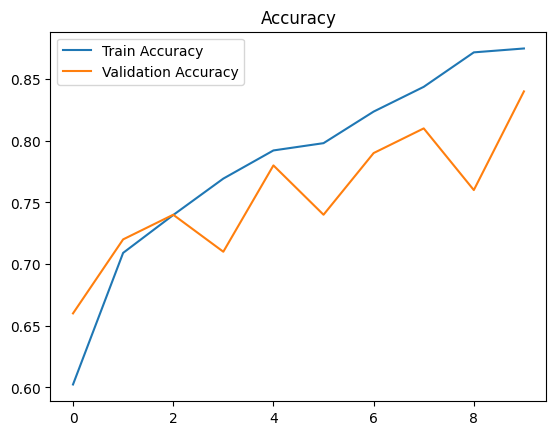

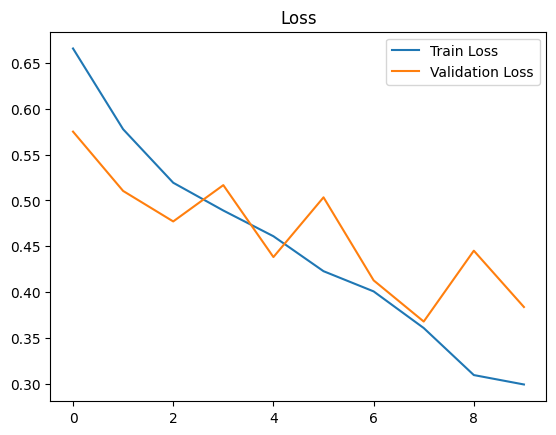

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

In [13]:
import os

test_dir = "test"  # or "Autism Dataset/test" if that's your path
for root, dirs, files in os.walk(test_dir):
    print(f"{root} contains {len(files)} files")
import os

for root, dirs, files in os.walk(".", topdown=True):
    print(f"{root} - {len(files)} files")

. - 2 files
./.config - 8 files
./.config/logs - 0 files
./.config/logs/2025.05.12 - 6 files
./.config/configurations - 1 files
./dataset - 0 files
./dataset/consolidated - 0 files
./dataset/consolidated/Autistic - 1470 files
./dataset/consolidated/Non_Autistic - 1470 files
./dataset/test - 300 files
./dataset/train - 0 files
./dataset/train/Autistic - 1270 files
./dataset/train/Non_Autistic - 1270 files
./dataset/valid - 0 files
./dataset/valid/Autistic - 50 files
./dataset/valid/Non_Autistic - 50 files
./sample_data - 6 files


In [14]:
import os

os.makedirs("dataset/test/Autistic", exist_ok=True)
os.makedirs("dataset/test/Non_Autistic", exist_ok=True)

In [15]:
import os
import shutil

test_dir = "dataset/test"

for filename in os.listdir(test_dir):
    src_path = os.path.join(test_dir, filename)

    # Skip if it's already a folder
    if os.path.isdir(src_path):
        continue

    # Classify based on filename
    if "non" in filename.lower():
        shutil.move(src_path, os.path.join(test_dir, "Non_Autistic", filename))
    elif "autistic" in filename.lower():
        shutil.move(src_path, os.path.join(test_dir, "Autistic", filename))

In [16]:
for root, dirs, files in os.walk("dataset/test"):
    print(f"{root} - {len(files)} files")

dataset/test - 0 files
dataset/test/Autistic - 150 files
dataset/test/Non_Autistic - 150 files


In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "dataset/test",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 300 images belonging to 2 classes.


In [18]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.8385 - loss: 0.4300
Test Accuracy: 0.83


In [20]:
# Save the entire model to a .h5 file
model.save('autism_cnn_model.h5')